In [13]:
#########################
### all_Q_means with time ###
########################## 
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import EventCollection

def calculate_SE(data, groups):
    """
    将数据分成指定数量的组，计算每个组的平均值，然后计算这些平均值的标准误差(SE)。
    """
    n = len(data)
    # 确保能够平均分组
    if n < groups:
        raise ValueError("数据量少于分组数量，无法分组。")
    
    # 计算每组的大小，使用整除 // 来确保得到整数
    group_size = n // groups
    
    # 初始化一个列表来存储每个子组的平均值
    group_means = []
    
    for i in range(groups):
        # 计算每个子组的开始和结束索引
        start_idx = i * group_size
        # 对于最后一个子组，确保包含所有剩余的数据
        if i == groups - 1:
            end_idx = n
        else:
            end_idx = start_idx + group_size
        # 计算子组的平均值并添加到列表中
        group_mean = np.mean(data[start_idx:end_idx])
        group_means.append(group_mean)
    
    # 计算所有子组平均值的标准差，并除以 sqrt(groups) 来计算标准误差
    se = np.std(group_means, ddof=1) / np.sqrt(groups)
    
    return se

In [14]:
import numpy as np

def data_generator(filenames):
    for filename in filenames:
        # 逐个文件读取数据
        data = np.loadtxt(filename, comments=['@', '#'])
        yield data

def compute_average(filenames):
    Q1_sum = None
    Q1_count = 0
    
    for data in data_generator(filenames):
        mask_Q1 = data[:, 1] < 0.8
        Q1_data = data[mask_Q1, 5:]
        
        if Q1_data.size > 0:
            if Q1_sum is None:
                Q1_sum = np.sum(Q1_data, axis=0)
            else:
                Q1_sum += np.sum(Q1_data, axis=0)
            
            Q1_count += Q1_data.shape[0]
    
    Q1_average = Q1_sum / Q1_count if Q1_count > 0 else None
    return Q1_average

# 文件名列表
filenames = [f'/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/COLVAR{i+1}' for i in range(50)]

Q1_average = compute_average(filenames)
print("Average of Q1:", Q1_average)

Average of Q1: [6.24427883e-02 5.29540665e-02 3.58820456e-02 4.27265037e-02
 5.97503288e-02 5.11072662e-02 5.02576533e-02 7.71630743e-02
 9.06091445e-02 8.30215383e-02 1.07340502e-01 1.74204671e-01
 2.02104025e-01 2.46900049e-01 3.37650859e-01 4.99757934e-01
 7.73998022e-01 1.56186720e+00 1.23786458e+00 1.18194402e+00
 1.82274493e+00 1.28391354e+00 1.57539610e+00 2.13309454e+00
 2.16918910e+00 1.43079752e+00 2.08501684e+00 1.98033055e+00
 2.90699092e+00 2.63707255e+00 2.78250241e+00 2.91571345e+00
 2.59931949e+00 1.92602879e+00 1.40012875e+00 1.02325924e+00
 7.32896985e-01 5.39077394e-01 4.04914542e-01 2.58917209e-01
 1.84009774e-01 1.39483940e-01 1.19441528e-01 1.07996018e-01
 1.04479121e-01 1.18408968e-01 1.52115063e-01 1.91982252e-01
 1.99562470e-01 1.97729480e-01 1.94743444e-01 1.91026020e-01
 1.85966059e-01 2.18941631e-01 2.76731902e-01 3.48508388e-01
 5.02251484e-01 5.97301262e-01 6.67384774e-01 7.64111517e-01
 8.63726890e-01 1.16589273e+00 1.53196567e+00 1.42570676e+00
 8.937096

In [15]:
import numpy as np

def data_generator(filenames):
    for filename in filenames:
        # 逐个文件读取数据
        data = np.loadtxt(filename, comments=['@', '#'])
        yield data

def compute_average(filenames):
    Q2_sum = None
    Q2_count = 0
    
    for data in data_generator(filenames):
        mask_Q2 = data[:, 1] >= 0.8
        Q2_data = data[mask_Q2, 5:]
        
        if Q2_data.size > 0:
            if Q2_sum is None:
                Q2_sum = np.sum(Q2_data, axis=0)
            else:
                Q2_sum += np.sum(Q2_data, axis=0)

            Q2_count += Q2_data.shape[0]
    
    Q2_average = Q2_sum / Q2_count if Q2_count > 0 else None
    return Q2_average

# 文件名列表
filenames = [f'/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/COLVAR{i+1}' for i in range(50)]

Q2_average = compute_average(filenames)
print("Average of Q:", Q2_average)

Average of Q: [5.46699251e-02 4.73012068e-02 3.22989338e-02 3.71391782e-02
 5.14360216e-02 4.57602965e-02 4.46631588e-02 6.64655676e-02
 7.90357744e-02 7.42153094e-02 9.38532380e-02 1.50229122e-01
 1.75271098e-01 2.17035528e-01 2.93765828e-01 4.26497198e-01
 6.56497400e-01 1.33285078e+00 1.05705611e+00 1.01222985e+00
 1.56866388e+00 1.12561126e+00 1.40526986e+00 1.90648222e+00
 1.90331684e+00 1.24669438e+00 1.84706058e+00 1.73424549e+00
 2.60945176e+00 2.36871976e+00 2.50969348e+00 2.63933126e+00
 2.35846784e+00 1.74808707e+00 1.27352216e+00 9.32678564e-01
 6.68370277e-01 4.92520053e-01 3.69302985e-01 2.36190423e-01
 1.66929902e-01 1.26382424e-01 1.07282129e-01 9.63673825e-02
 9.31868265e-02 1.04329409e-01 1.31504002e-01 1.63616647e-01
 1.69569515e-01 1.68470444e-01 1.66618690e-01 1.64299629e-01
 1.60212833e-01 1.87210812e-01 2.34691074e-01 2.94430658e-01
 4.18273841e-01 4.97005146e-01 5.57458203e-01 6.44439517e-01
 7.42224600e-01 1.01729272e+00 1.46728925e+00 1.52086562e+00
 1.0986103

In [16]:
import pandas as pd
import numpy as np
from Bio.PDB.PDBParser import PDBParser

def extract_protein_info_from_pdb(file_path):
    protein_info = {}
    
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', file_path)
    
    for model in structure:
        for chain in model:
            if chain.id == 'B':
                for residue in chain:
                    res_id = residue.id[1]
                    res_name = residue.get_resname()
                    if res_id not in protein_info:
                        protein_info[res_id] = res_name
    return protein_info

pdb_file_path = "chainID.pdb"
protein_info = extract_protein_info_from_pdb(pdb_file_path)

resi_info = []
count = 0
for key, value in protein_info.items():
    resi_info.append(f"{key+377}")
    count += 1
    if count == 142:
        break

#找到Q1_average和Q2_average中的最大值
max_value = max(max(Q1_average), max(Q2_average))

def save_data_to_csv(resi_info, q1_normalized, q2_normalized, filename="contact_data_0.3.csv"):
    """Save the contact data to a CSV file"""
    df = pd.DataFrame({
        'residue_index': resi_info,
        'q1_normalized': q1_normalized,
        'q2_normalized': q2_normalized
    })
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Use this after calculating your data
save_data_to_csv(resi_info, Q1_average/max_value, Q2_average/max_value)

Data saved to contact_data_0.3.csv


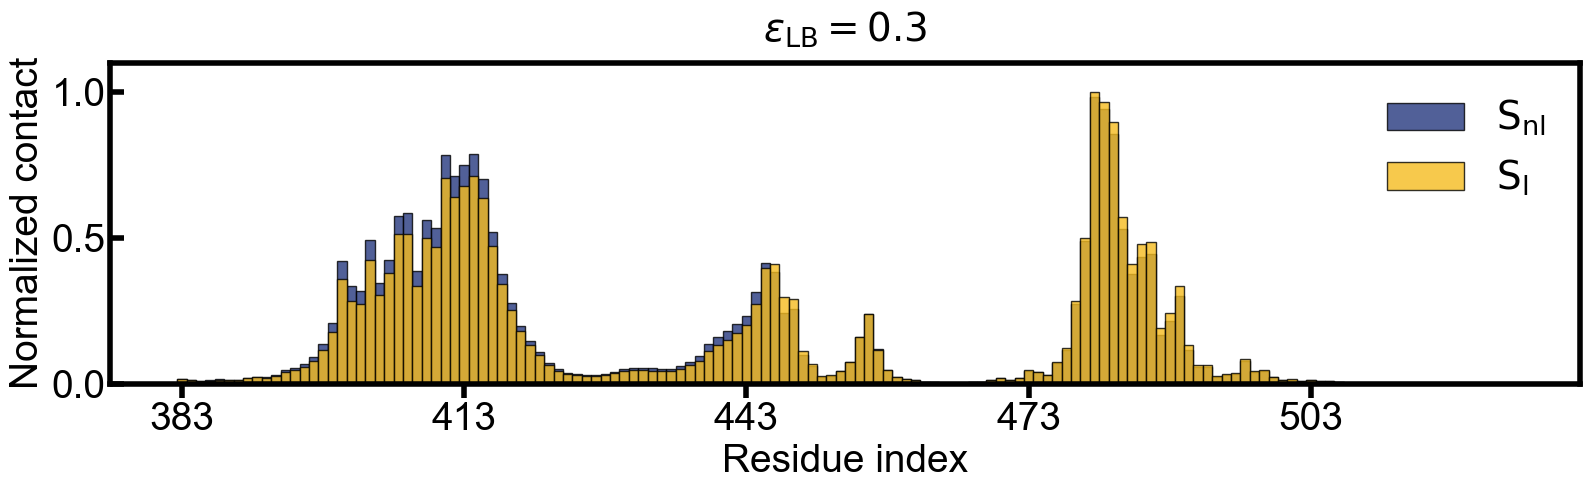

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configure matplotlib
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.titlesize': 28,
    'axes.labelsize': 28,
    'xtick.labelsize': 28,
    'ytick.labelsize': 28,
    'legend.fontsize': 28,
    'axes.linewidth': 4,
    'xtick.major.size': 10,
    'ytick.major.size': 10,
    'xtick.minor.size': 5,
    'ytick.minor.size': 5,
    'xtick.major.width': 4,
    'ytick.major.width': 4,
    'xtick.minor.width': 4,
    'ytick.minor.width': 4,
    'axes.grid': False,
})

# Data loading function (choose one based on your data format)
def read_data_csv(filename):
    df = pd.read_csv(filename)
    # Adjust column names as needed
    resi_info = df['residue_index'].values
    Q1_average = df['q1_normalized'].values  # S_nl data
    Q2_average = df['q2_normalized'].values     # S_l data
    return resi_info, Q1_average, Q2_average

def plot_bar_chart(x_data, y_data1, y_data2):
    fig, ax = plt.subplots(figsize=(16, 5))
    width = 1.0  # 设置每个柱子的宽度

    bar_color1 = '#25387F'  # 第一组柱子的颜色
    bar_color2 = '#F5BC1F'  # 第二组柱子的颜色

    # 绘制第一组柱状图
    ax.bar(np.arange(len(x_data)), y_data1, width=width, color=bar_color1, label=r'$\text{S}_\text{nl}$', edgecolor='black', alpha=0.8)

    # 绘制第二组柱状图，叠加在第一组上
    ax.bar(np.arange(len(x_data)), y_data2, width=width, color=bar_color2, label=r'$\text{S}_\text{l}$', edgecolor='black', alpha=0.8)

    ax.set_xlabel('Residue index')
    ax.set_ylabel('Normalized contact')
    # x 轴刻度朝内
    ax.tick_params(axis='x', which='both', direction='out')
    # y 轴刻度朝内
    ax.tick_params(axis='y', which='both', direction='in')
    plt.title(r"$\epsilon_\text{LB} = 0.3$",pad = 15)

    # 调整x轴刻度的位置，每隔30个显示一个
    plt.xticks(np.arange(0, len(x_data), 30), x_data[::30], rotation=0)

    plt.ylim(0, max(max(y_data1), max(y_data2)) * 1.1)
    plt.yticks([0,0.5,1])
    plt.legend(loc='upper right', frameon=False)
    plt.savefig("resi_norcontact0.3.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Use the appropriate function for your data format
    # Example for CSV format:
    data_file = "contact_data_0.3.csv"  # Replace with your actual file path
    resi_info, q1_normalized, q2_normalized = read_data_csv(data_file)
    
    # Or for text file format:
    # data_file = "your_data_file.txt"
    # resi_info, Q1_average, Q2_average, max_value = read_data_txt(data_file)
    
    # Plot the normalized data
    plot_bar_chart(resi_info, q1_normalized, q2_normalized)